In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import warnings

warnings.filterwarnings("ignore")

# Import Data from Kaggle 

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

# Show Data Before Processing ( Cleaning):

In [4]:
train.head(150)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S


In [5]:
train.shape

(891, 12)

In [6]:
col_names = train.columns

col_names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train['Survived'].isnull().sum()


0

In [10]:
s = (train.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [11]:
for i in object_cols:
    print(i, train[i].isnull().sum())

Name 0
Sex 0
Ticket 0
Cabin 687
Embarked 2


In [12]:
t = (train.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['Age', 'Fare']


In [13]:
for i in num_cols:
    print(i, train[i].isnull().sum())

Age 177
Fare 0


In [14]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
train['Survived'].value_counts()/len(train)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

# Data Visualization :

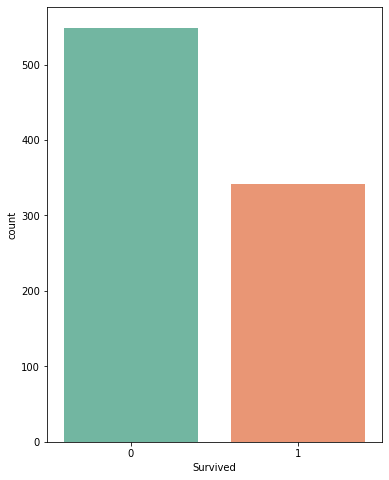

In [16]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="Survived", data=train, palette="Set2")
plt.show()

In [17]:
for var in object_cols: 
    
    print(train[var].value_counts())

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 14

In [18]:
for var in object_cols:
    
    print(var, ' has ', len(train[var].unique()), ' unqiue values')

Name  has  891  unqiue values
Sex  has  2  unqiue values
Ticket  has  681  unqiue values
Cabin  has  148  unqiue values
Embarked  has  4  unqiue values


<AxesSubplot:xlabel='Sex', ylabel='count'>

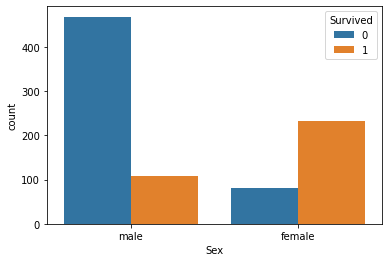

In [19]:
sns.countplot(train['Sex'], hue=train['Survived'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

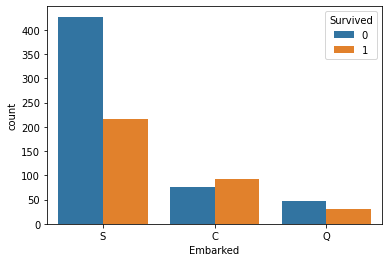

In [20]:
sns.countplot(train['Embarked'], hue=train['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

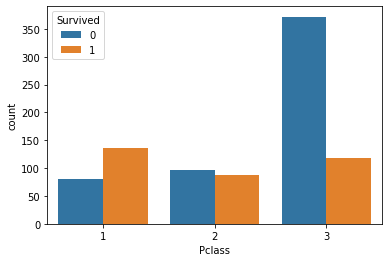

In [21]:
sns.countplot(train['Pclass'], hue=train['Survived'])

<AxesSubplot:xlabel='Age', ylabel='count'>

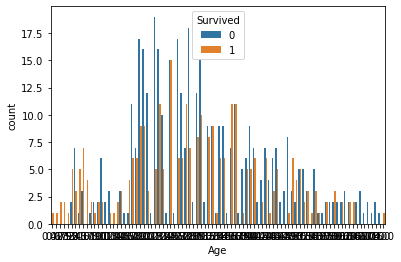

In [22]:
sns.countplot(train['Age'], hue=train['Survived'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

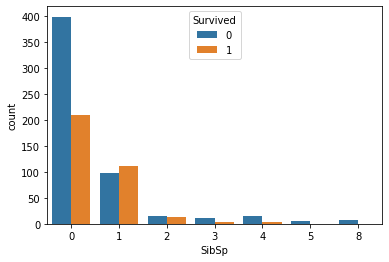

In [23]:
sns.countplot(train['SibSp'], hue=train['Survived'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

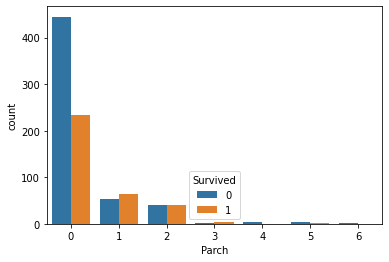

In [24]:
sns.countplot(train['Parch'], hue=train['Survived'])

<AxesSubplot:xlabel='Fare', ylabel='count'>

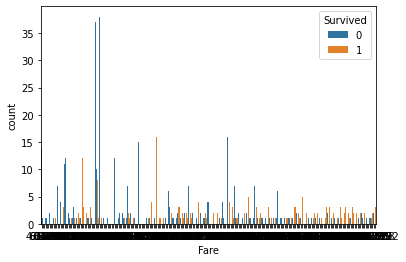

In [25]:
sns.countplot(train['Fare'], hue=train['Survived'])

In [26]:
num_data = train[num_cols]
num_data.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                             .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


In [27]:
correlation = train.corr()

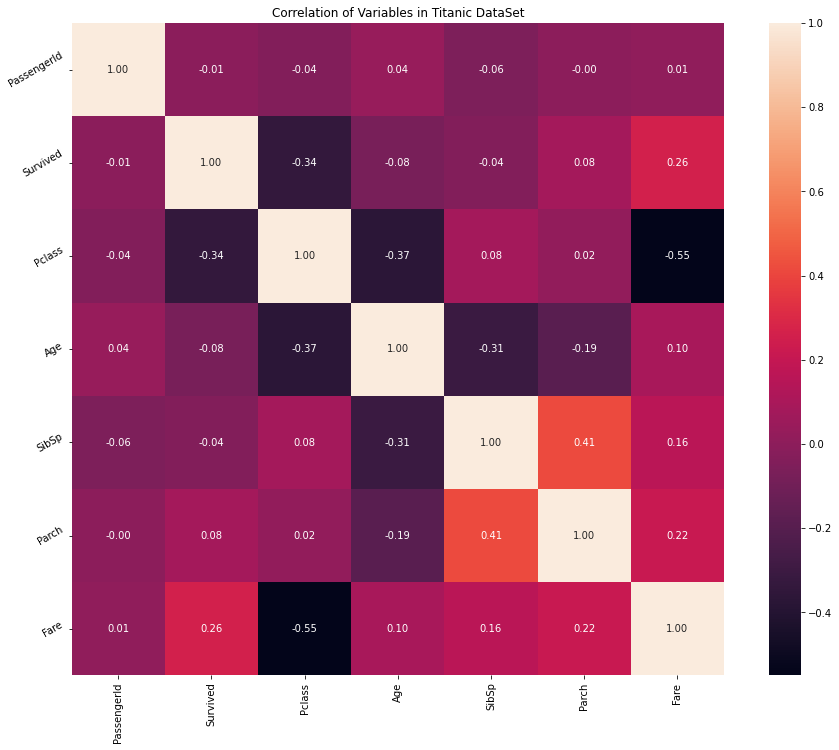

In [28]:
plt.figure(figsize=(16,12))
plt.title('Correlation of Variables in Titanic DataSet')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

# Data Cleaning :

In [29]:
def cleanData(data):
    
    # Data missing and categorical to drop
    data.drop(['Cabin','Name','Ticket'], axis=1, inplace=True)

    # Data missing Case2
    data['Age'] = data.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
    
    # FARE Data missing in test
    data['Fare'] = data.groupby(['Pclass','Sex'])['Fare'].transform(lambda x: x.fillna(x.median()))

    # Data missing Case3
    data.dropna(axis=0, subset=['Embarked'], inplace=True)
    
    # Categorical Data
    le = preprocessing.LabelEncoder()
    
    # Sex
    data['Sex'].replace({'male':0, 'female':1}, inplace=True)
    
    # Embarked
    data['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)
    
    return data

In [30]:
clean_train = cleanData(train)
clean_test = cleanData(test)

In [31]:
X = train.drop(['Survived'], axis=1)

y = train['Survived']

In [32]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,3,0,35.0,0,0,8.0500,0


# Data splitting :

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [34]:
X_train.shape, X_test.shape

((666, 8), (223, 8))

In [35]:
IQR = train.Age.quantile(0.75) - train.Age.quantile(0.25)
Lower_fence = train.Age.quantile(0.25) - (IQR * 3)
Upper_fence = train.Age.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -22.0 or > 79.5


In [36]:
IQR = train.Fare.quantile(0.75) - train.Fare.quantile(0.25)
Lower_fence = train.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = train.Fare.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -61.4168 or > 100.3126


In [37]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Age'] = max_value(df3, 'Age', 79.5)
    df3['Fare'] = max_value(df3, 'Fare', 100.3126)

In [38]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Start The Model :

In [39]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.7937219730941704
ROC Area under Curve = 0.7756443521882027
Cohen's Kappa = 0.554116317482396
Time taken = 0.014824390411376953
              precision    recall  f1-score   support

           0    0.83217   0.84397   0.83803       141
           1    0.72500   0.70732   0.71605        82

    accuracy                        0.79372       223
   macro avg    0.77858   0.77564   0.77704       223
weighted avg    0.79276   0.79372   0.79317       223



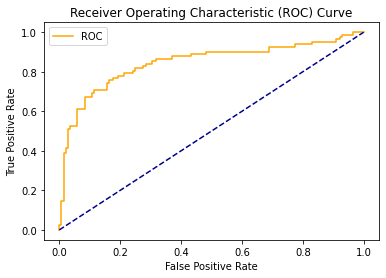

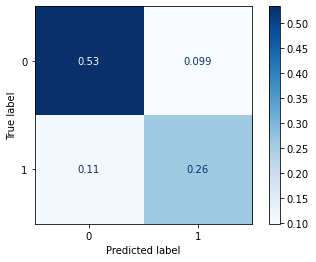

In [40]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.8026905829596412
ROC Area under Curve = 0.7878394741394222
Cohen's Kappa = 0.5756789482788445
Time taken = 0.009592771530151367
              precision    recall  f1-score   support

           0    0.84397   0.84397   0.84397       141
           1    0.73171   0.73171   0.73171        82

    accuracy                        0.80269       223
   macro avg    0.78784   0.78784   0.78784       223
weighted avg    0.80269   0.80269   0.80269       223



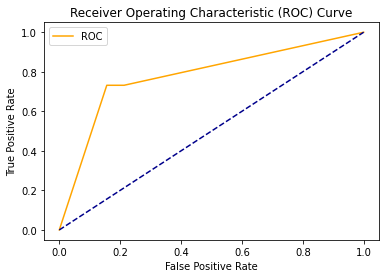

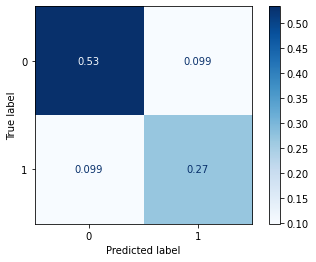

In [41]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.8026905829596412
ROC Area under Curve = 0.7801850890849333
Cohen's Kappa = 0.5690821256038647
Time taken = 0.16364765167236328
              precision    recall  f1-score   support

           0    0.82993   0.86525   0.84722       141
           1    0.75000   0.69512   0.72152        82

    accuracy                        0.80269       223
   macro avg    0.78997   0.78019   0.78437       223
weighted avg    0.80054   0.80269   0.80100       223



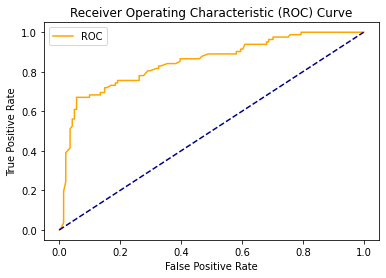

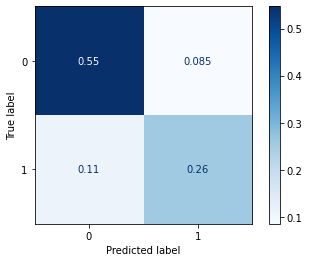

In [42]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Accuracy = 0.8340807174887892
ROC Area under Curve = 0.8203165542293721
Cohen's Kappa = 0.6422718404508996
Time taken = 0.12418341636657715
              precision    recall  f1-score   support

           0    0.86620   0.87234   0.86926       141
           1    0.77778   0.76829   0.77301        82

    accuracy                        0.83408       223
   macro avg    0.82199   0.82032   0.82113       223
weighted avg    0.83368   0.83408   0.83386       223



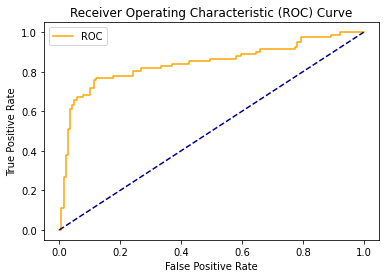

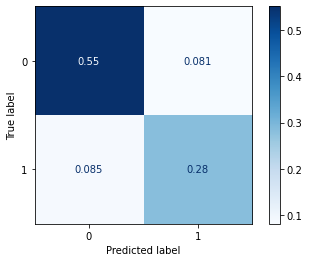

In [43]:
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

Accuracy = 0.8071748878923767
ROC Area under Curve = 0.7811797266908841
Cohen's Kappa = 0.5755765059974329
Time taken = 0.8659415245056152
              precision    recall  f1-score   support

           0    0.82667   0.87943   0.85223       141
           1    0.76712   0.68293   0.72258        82

    accuracy                        0.80717       223
   macro avg    0.79689   0.78118   0.78741       223
weighted avg    0.80477   0.80717   0.80456       223



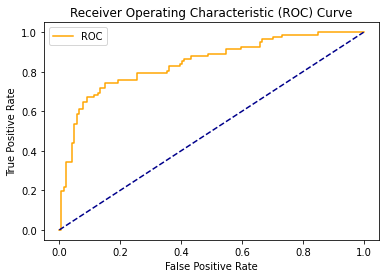

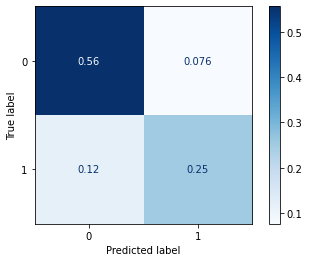

In [44]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

# Prediction :


In [45]:
predict = model_lgb.predict(pd.get_dummies(clean_test))

In [46]:
output = pd.DataFrame({'PassengerId': clean_test.PassengerId, 'Survived': predict})
output.to_csv('my_submission.csv', index=False)
print("Submission saved")

Submission saved
